# Beeodiversity challenge: Could bees predict the soil pollution?
###### Yellow Farm is a cooperative organization that is growing organic peers and apples. They are currently based in south east of Brussels and they are looking for a new orchard implementation. This area should contain a great versatility of insects (especially pollinators) and should bee be free from pesticides to keep their organic label.


In [2]:
# import related libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Heavy Metals dataset, data exploration and preparation

In [3]:
# heavy metals from 2017 to 2020
hm1 = pd.read_excel('data/2017/HM/HM_2017_P1.xlsx')
hm2 = pd.read_excel('data/2017/HM/HM_2017_P2.xlsx')
hm3 = pd.read_excel('data/2017/HM/HM_2017_P3.xlsx')
hm4 = pd.read_excel('data/2017/HM/HM_2017_P4.xlsx')
hm5 = pd.read_excel('data/2018/HM/HM_2018_P1.xlsx')
hm6 = pd.read_excel('data/2018/HM/HM_2018_P2.xlsx')
hm7 = pd.read_excel('data/2018/HM/HM_2018_P3.xlsx')
hm8 = pd.read_excel('data/2018/HM/HM_2018_P4.xlsx')
hm9 = pd.read_excel('data/2019/HM/HM_2019_P1.xlsx')
hm10 = pd.read_excel('data/2019/HM/HM_2019_P2.xlsx')
hm11 = pd.read_excel('data/2019/HM/HM_2019_P3.xlsx')
hm12 = pd.read_excel('data/2019/HM/HM_2019_P4.xlsx')
hm13 = pd.read_excel('data/2020/HM/HM_2020_P1.xlsx')
hm14 = pd.read_excel('data/2020/HM/HM_2020_P2.xlsx')
hm15 = pd.read_excel('data/2020/HM/HM_2020_P3.xlsx')
hm16 = pd.read_excel('data/2020/HM/HM_2020_P4.xlsx')


In [4]:
list1 = [hm1, hm2, hm3, hm4, hm5, hm6, hm7, hm8, hm9, hm10, hm11, hm12, hm13, hm14, hm15, hm16]

# checking for columns dispositons
#for i in list1:
 #   print(i.columns)

In [5]:
# join the hm datasets
hm = pd.concat([hm1, hm2, hm3, hm4, hm5, hm6, hm7, hm8, hm9, hm10, hm11, hm12, hm13, hm14, hm15, hm16], axis=0)

In [6]:
#hm

In [6]:
hm.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead,431.0,0.221285,0.322265,0.000,0.06250,0.130,0.24500,3.000
Cadmium,431.0,0.186947,0.221463,0.011,0.06000,0.110,0.22000,2.100
Arsenic,431.0,0.037369,0.040220,0.000,0.00000,0.037,0.05700,0.340
Mercury,431.0,0.000427,0.002567,0.000,0.00000,0.000,0.00000,0.042
Copper,431.0,7.972158,2.809016,0.000,6.60000,7.700,9.00000,37.000
Chromium,66.0,0.088727,0.144092,0.000,0.02725,0.044,0.11225,1.100
Zinc,431.0,38.679814,10.387808,15.000,32.00000,37.000,44.00000,108.000
Chrome,365.0,0.107748,0.091180,0.015,0.05100,0.081,0.12000,0.710


In [7]:
print(f'Shape of Heavy metal = {hm.shape}')

Shape of Heavy metal = (431, 10)


In [8]:
# null values
hm.isna().sum()

REF....SUBSTANCE      0
PERIOD                0
Lead                  0
Cadmium               0
Arsenic               0
Mercury               0
Copper                0
Chromium            365
Zinc                  0
Chrome               66
dtype: int64

in 2020, chromium = chrome then we have to join the two columns

In [9]:
# fill nan values of chrome with chromium values
hm['Chrome'].fillna(hm['Chromium'], inplace=True)

In [10]:
# drop chromium column
hm.drop('Chromium', axis=1, inplace=True)

In [11]:
# null values
hm.isna().sum()

REF....SUBSTANCE    0
PERIOD              0
Lead                0
Cadmium             0
Arsenic             0
Mercury             0
Copper              0
Zinc                0
Chrome              0
dtype: int64

In [13]:
print(f'Shape of Heavy metal = {hm.shape}')

Shape of Heavy metal = (431, 9)


In [14]:
#hm.describe().T

In [15]:
#hm.sample(10)

In [16]:
# heatmap to check correlation between columns
# sns.heatmap(hm.corr(), cmap='coolwarm')

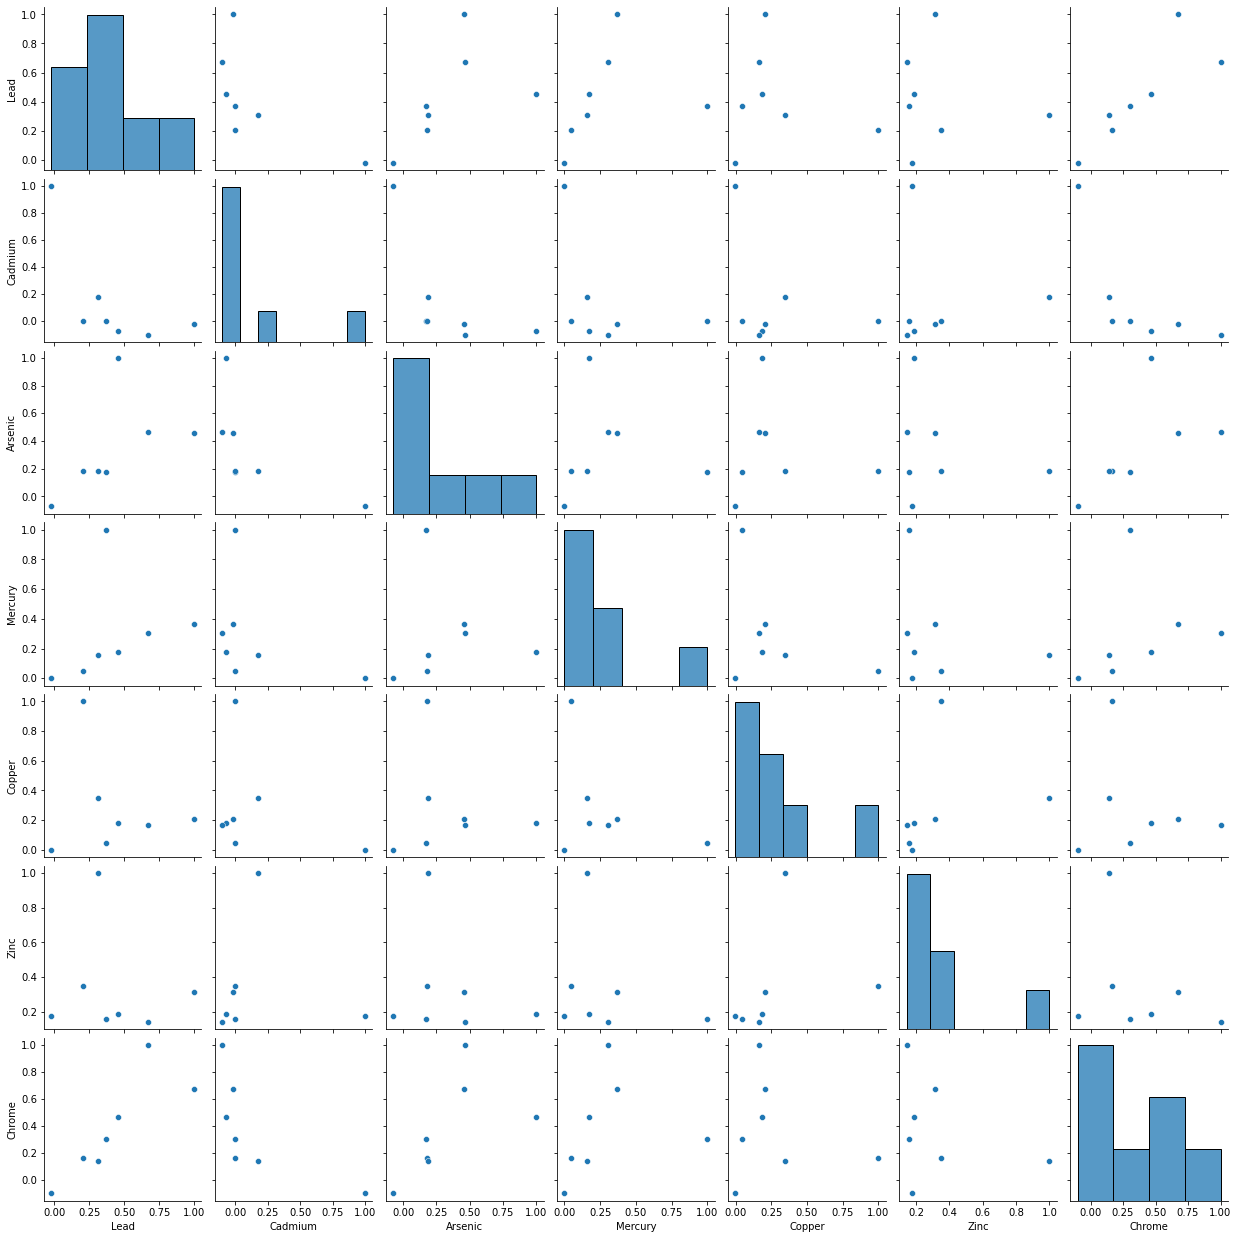

In [14]:
# pairplot
sns.pairplot(hm.corr())

we can see that the most correlate columns are Mercury, Arsenic and Lead.

let's plot Lead  and Chrome and Lead and Arsenic

In [18]:
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='Lead', y='Chrome', data=hm)
# plt.xlabel('Lead')
# plt.ylabel('Chrome')
# plt.legend()
# plt.show()

Lead and Chrome have a linear relation. but when Lead = 0, the relation is different (vertical line)

In [19]:
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='Lead', y='Arsenic', data=hm)
# plt.xlabel('Lead')
# plt.ylabel('Arsenic')
# plt.legend()
# plt.show()

Similarly, we have a linear relation and when Arsenic=0, the relation change (horizontal line)

In [20]:
#hm

In [21]:
hm.rename(columns={"REF....SUBSTANCE" : 'Site'}, inplace=True)

In [22]:
hm = hm.sort_values(by='Site')
#hm

In [23]:
hm = hm.groupby(['Site'], as_index=True).mean()

In [24]:
# adding columns for MLR tresholds
hm['mlr_Lead'] = np.where(hm['Lead'] > 1.5, 1, 0)
hm['mlr_Cadmium'] = np.where(hm['Cadmium'] > 1, 1, 0)
hm['mlr_Arsenic'] = np.where(hm['Arsenic'] > 0.3, 1, 0)
hm['mlr_Mercury'] = np.where(hm['Mercury'] > 1, 1, 0)
hm['mlr_Copper'] = np.where(hm['Copper'] > 30, 1, 0)
hm['mlr_Zinc'] = np.where(hm['Zinc'] > 0, 1, 0)
hm['mlr_Chrome'] = np.where(hm['Chrome'] > 0, 1, 0)

In [25]:
hm.head(10)
print(hm.isnull().sum().sum())

0


In [26]:
#hm_T = hm.pivot_table(columns='Site')

# Import surface dataset and preparation

In [27]:
#surf_hm = pd.read_csv('data/surf_hm.csv', index_col=0)
#surf_hm.head
surf_hm = pd.read_excel('data/absSurfs.xlsx', index_col=0)
surf_hm.head(5)

,111,112,121,122,123,124,131,132,133,141,...,411,412,421,422,423,511,512,521,522,523
Site,,,,,,,,,,,,,,,,,,,,,
F0069,0.0,1.064122e+06,3.587087e+05,0.000000,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0.0,0.000000,0,0,0.0
F0025,0.0,0.000000e+00,0.000000e+00,412752.692383,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0.0,0.000000,0,0,0.0
F0027,0.0,2.741746e+05,0.000000e+00,0.000000,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0.0,0.000000,0,0,0.0
B0128,0.0,2.470089e+06,4.053755e+06,497496.251770,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0.0,0.000000,0,0,0.0
F0023,0.0,0.000000e+00,2.559254e+05,0.000000,0.0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0,0.0,0.0,284728.392578,0,0,0.0


(63, 44)
0


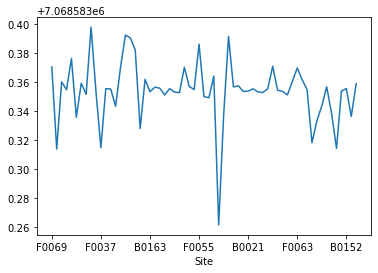

In [28]:
print(surf_hm.shape)
print(surf_hm.isnull().sum().sum())
area_check= surf_hm.sum(axis=1)
area_check.plot()
plt.show()


In [29]:
surf_hm = surf_hm.apply(lambda x: (x/surf_hm.sum() * 100).round(1), axis=1)
check=surf_hm.sum(axis=1)
check.max


<bound method Series.max of Site
F0069    15.4
F0025    25.4
F0027     9.8
B0128    24.8
F0023    22.0
         ... 
F0007    17.1
B0069    13.2
B0152    26.6
F0003    19.4
B0158    45.7
Length: 63, dtype: float64>

In [30]:
surf_hm_perc = surf_hm.apply(lambda x: (x/x.sum() * 100).round(1), axis=1)
check=surf_hm_perc.sum(axis=1)
check


Site
F0069    100.0
F0025    100.0
F0027    100.1
B0128     99.9
F0023     99.9
         ...  
F0007    100.0
B0069    100.0
B0152    100.0
F0003    100.0
B0158     99.9
Length: 63, dtype: float64

# Import pesticide prepared dataset
## Mainf steps of preparation
#### 1) select the most seen pesticides (>250 times), plot them on a heatmap and pair plot to see correlations
#### 2) join different xls in a single dataset
#### 3) keep only family (5 of them) for further calculation

In [31]:
pest=pd.read_csv('pest_prep.csv',index_col=0)
pest.drop('LMR', axis=0, inplace=True)
pest_inc = pest.apply(lambda x: x*100, axis=1)
print(pest_inc.shape)
check1=pest_inc.sum(axis=1)
check1

(38, 5)


B0012    0.000000
B0017    0.840909
B0019    0.025000
B0021    0.000000
B0032    0.000000
B0061    0.000000
B0067    0.100000
B0069    2.108636
B0077    0.769545
B0093    0.067727
B0103    0.129091
B0105    0.000000
B0140    0.000000
B0152    0.066818
B0158    0.535455
B0163    0.534545
F0001    0.049545
F0005    0.000000
F0007    0.000000
F0009    0.025909
F0011    0.000000
F0013    0.000000
F0015    0.000000
F0017    0.000000
F0019    0.000000
F0020    0.977045
F0021    0.125909
F0029    1.225606
F0033    0.017273
F0035    0.000000
F0039    0.285000
F0055    0.000000
F0057    0.510000
F0061    0.193333
F0063    1.391364
F0065    1.427273
F0071    0.102500
F0073    1.581212
dtype: float64

# Import distance dataset and preparation

In [32]:
dist_hm = pd.read_excel('data/distsOneSheet.xlsx')
dist_hm.drop('polyID',axis=1, inplace=True)
dist_hm_gr=dist_hm.groupby(['Site','classCLC'],as_index = False)['dist'].mean()
print(dist_hm_gr.head(5))
print(dist_hm_gr.shape, dist_hm.shape)

    Site  classCLC         dist
0  B0012       111  1020.033273
1  B0012       112   564.609800
2  B0012       121   117.220148
3  B0012       242  1253.539431
4  B0012       243   922.008813
(384, 3) (632, 3)


### Transformation of distance data to reflect "how close the hive is from the specific area"
##### 1) create new columns
##### 2) scale non null distance with max distance value to get a decreasing distribution when the hive is further
##### 3) replace null value arbitray 200 value to increase the weigh of having a hive with the land
##### 4) replace NaN with nulls

In [34]:
trans_dist_hm = dist_hm_gr.pivot(index='Site',columns = 'classCLC', values='dist')

trans_dist_hm=trans_dist_hm.rename(columns=lambda x: str(x) +'_d')
trans_dist_hm_perc = trans_dist_hm.apply(lambda x: (x/x.max())*100, axis=1)
trans_dist_hm_perc=trans_dist_hm_perc.replace([0],200)
trans_dist_hm_perc=trans_dist_hm_perc.fillna(0.0)
#print(trans_dist_hm_perc.head(5))
print(trans_dist_hm_perc.max())


classCLC
111_d     87.889227
112_d    200.000000
121_d    200.000000
122_d    100.000000
123_d     99.675879
124_d     65.680683
131_d    200.000000
133_d    100.000000
141_d    100.000000
142_d    200.000000
211_d    200.000000
221_d     73.143818
231_d    200.000000
242_d    200.000000
243_d    200.000000
311_d    200.000000
312_d    200.000000
313_d    200.000000
322_d     98.927805
324_d    100.000000
331_d    100.000000
412_d    200.000000
423_d    100.000000
511_d     88.282037
512_d    100.000000
523_d     93.469251
dtype: float64


In [35]:
trans_dist_hm_perc.isnull().sum().sum()


0

# Modeling
### Classification prediction 
#### 1) Are Lead, Zinc or Chrome are present in the soil above MRL value in the area?
#### 2) Is Mercury is present in the soil in the surrounding area?
#### 3) Is insecticide is present in the soil in the surrounding area?
#### 4) Is fungicide is present in the soil in the surrounding area?
#### 5) Is herbicide is present in the soil in the surrounding area?
### Regression prediction 
#### Fail

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### 1) Are Lead, Zinc or Chrome are present in the soil above MRL value in the area?

In [66]:
#Classification for heavy metals MLR
metals_list=[ 'mlr_Lead', 'mlr_Zinc', 'mlr_Chrome']
for m in metals_list:
    total = [surf_hm, hm,trans_dist_hm_perc,pest_inc]
    df = pd.concat(total, axis = 1)
    df =df.fillna(0.0)
    X = df.drop(m , 1).values # drop target variable
    y1 = df[m].values
    y = y1
    X_scaled = scale(X)
    
    print("Mean of Unscaled Features for {}: {}".format(m,np.mean(X))) 
    print("Standard Deviation of Unscaled Features for {}: {}".format(m,np.std(X)))
    print("Mean of Scaled Features for {}: {}".format(m,np.mean(X_scaled))) 
    print("Standard Deviation of Scaled Features for {}: {}".format(m,np.std(X_scaled)))
    
    steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
    pipeline = Pipeline(steps)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn_scaled = pipeline.fit(X_train, y_train)
    knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

    print('Accuracy with Scaling for {}: {}'.format(m,knn_scaled.score(X_test, y_test)))
    print('Accuracy without Scaling for {}: {}'.format(m,knn_unscaled.score(X_test, y_test)))
    steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

    pipeline = Pipeline(steps)

    parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    cv = GridSearchCV(pipeline, parameters, cv=2)

    cv.fit(X_train, y_train)
    y_pred = cv.predict(X_test)

    print("Accuracy for {}: {}".format(m,cv.score(X_test, y_test)))
    print(classification_report(y_test, y_pred))
    print("Tuned Model Parameters for {}: {}".format(m,cv.best_params_))

Mean of Unscaled Features for mlr_Lead: 5.890071207558484
Standard Deviation of Unscaled Features for mlr_Lead: 22.40346605333686
Mean of Scaled Features for mlr_Lead: 8.985583175057957e-18
Standard Deviation of Scaled Features for mlr_Lead: 0.8707707839849465
Accuracy with Scaling for mlr_Lead: 1.0
Accuracy without Scaling for mlr_Lead: 1.0
Accuracy for mlr_Lead: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Tuned Model Parameters for mlr_Lead: {'SVM__C': 1, 'SVM__gamma': 0.1}
Mean of Unscaled Features for mlr_Zinc: 5.8799543402987595
Standard Deviation of Unscaled Features for mlr_Zinc: 22.40589766382656
Mean of Scaled Features for mlr_Zinc: 6.8166493052163805e-18
Standard Deviation of Scaled Features for mlr_Zinc: 0.8707707839849465
Accuracy with Scaling f

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
total = [surf_hm, hm,trans_dist_hm_perc,pest_inc]
result = pd.concat(total, axis = 1)
result = result.fillna(0)
result.to_excel('global.xls')

#### 2) Is Mercury  present in the soil in the surrounding area?

In [57]:
#Classification for mercury(presence or absence)
#metals_list=[ 'mlr_Lead', 'mlr_Zinc', 'mlr_Chrome']
#for m in metals_list:
print(hm.columns)
m='Mercury'
hm['is_Mercury'] = np.where(hm['Mercury'] > 0, 1, 0)
hm_Hg=hm.drop(['Mercury'],1)
hm_Hg=hm_Hg.drop(['mlr_Mercury'],1)
total = [surf_hm, hm_Hg,trans_dist_hm_perc,pest_inc]
df = pd.concat(total, axis = 1)
df =df.fillna(0.0)
X = df.drop(['is_Mercury'] , 1).values # drop target variable
y1 = df['is_Mercury'].values
y = y1
X_scaled = scale(X)

print("Mean of Unscaled Features for {}: {}".format(m,np.mean(X))) 
print("Standard Deviation of Unscaled Features for {}: {}".format(m,np.std(X)))
print("Mean of Scaled Features for {}: {}".format(m,np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features for {}: {}".format(m,np.std(X_scaled)))

steps = [('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling for {}: {}'.format(m,knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling for {}: {}'.format(m,knn_unscaled.score(X_test, y_test)))
steps = [('scaler', StandardScaler()),
     ('SVM', SVC())]

pipeline = Pipeline(steps)

parameters = {'SVM__C':[1, 10, 100],
          'SVM__gamma':[0.1, 0.01]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cv = GridSearchCV(pipeline, parameters, cv=2)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Accuracy for {}: {}".format(m,cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters for {}: {}".format(m,cv.best_params_))

Index(['Lead', 'Cadmium', 'Arsenic', 'Mercury', 'Copper', 'Zinc', 'Chrome',
       'mlr_Lead', 'mlr_Cadmium', 'mlr_Arsenic', 'mlr_Mercury', 'mlr_Copper',
       'mlr_Zinc', 'mlr_Chrome', 'is_Mercury'],
      dtype='object')
Mean of Unscaled Features for Mercury: 6.020645078214672
Standard Deviation of Unscaled Features for Mercury: 22.636627206443013
Mean of Scaled Features for Mercury: 1.2355612045052571e-17
Standard Deviation of Scaled Features for Mercury: 0.8740966444394034
Accuracy with Scaling for Mercury: 0.7368421052631579
Accuracy without Scaling for Mercury: 0.7368421052631579
Accuracy for Mercury: 0.7368421052631579
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        14
         1.0       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

Tuned Model Parameters for Mercury: {'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3) Is insecticide  present in the soil in the surrounding area?

In [65]:
#Classification for insecticide(presence or absence)

print(pest_inc.columns)
m='insecticide'
pest_inc['is_insecticide'] = np.where(pest_inc['insecticide'] > 0, 1, 0)
pest_inc_ins=pest_inc.drop(['insecticide'],1)
#hm_Hg=hm_Hg.drop(['mlr_Mercury'],1)
total = [surf_hm, hm_Hg,trans_dist_hm_perc,pest_inc_ins]
df = pd.concat(total, axis = 1)
df =df.fillna(0.0)
X = df.drop(['is_insecticide'] , 1).values # drop target variable
y1 = df['is_insecticide'].values
y = y1
X_scaled = scale(X)

print("Mean of Unscaled Features for {}: {}".format(m,np.mean(X))) 
print("Standard Deviation of Unscaled Features for {}: {}".format(m,np.std(X)))
print("Mean of Scaled Features for {}: {}".format(m,np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features for {}: {}".format(m,np.std(X_scaled)))

steps = [('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling for {}: {}'.format(m,knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling for {}: {}'.format(m,knn_unscaled.score(X_test, y_test)))
y_pred = knn_scaled.predict(X_test)
print(classification_report(y_test, y_pred))
#steps = [('scaler', StandardScaler()),
#     ('SVM', SVC())]

#pipeline = Pipeline(steps)

#parameters = {'SVM__C':[1, 10, 100],
#          'SVM__gamma':[0.1, 0.01]}

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#cv = GridSearchCV(pipeline, parameters, cv=2)

#cv.fit(X_train, y_train)
#y_pred = cv.predict(X_test)

#print("Accuracy for {}: {}".format(m,cv.score(X_test, y_test)))
#print(classification_report(y_test, y_pred))
#print("Tuned Model Parameters for {}: {}".format(m,cv.best_params_))

Index(['bird repellant', 'fungicide', 'fungicide and growth regulator',
       'herbicide', 'insecticide', 'is_herbicide', 'is_insecticide'],
      dtype='object')
Mean of Unscaled Features for insecticide: 6.090442572189095
Standard Deviation of Unscaled Features for insecticide: 22.75539164606703
Mean of Scaled Features for insecticide: 1.1815144021083015e-17
Standard Deviation of Scaled Features for insecticide: 0.8725615372932939
Accuracy with Scaling for insecticide: 0.90625
Accuracy without Scaling for insecticide: 0.90625
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        29
         1.0       0.00      0.00      0.00         3

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4) Is fungicide  present in the soil in the surrounding area?

In [58]:
#Classification for fungicide(presence or absence)
pest_inc = pest.apply(lambda x: x*100, axis=1)
print(pest_inc.columns)
m='fungicide'
pest_inc['is_fungicide'] = np.where(pest_inc['fungicide'] > 0, 1, 0)
pest_inc_fun=pest_inc.drop(['fungicide'],1)
#hm_Hg=hm_Hg.drop(['mlr_Mercury'],1)
total = [surf_hm, hm_Hg,trans_dist_hm_perc,pest_inc_fun]
df = pd.concat(total, axis = 1)
df =df.fillna(0.0)
X = df.drop(['is_fungicide'] , 1).values # drop target variable
y1 = df['is_fungicide'].values
y = y1
X_scaled = scale(X)

print("Mean of Unscaled Features for {}: {}".format(m,np.mean(X))) 
print("Standard Deviation of Unscaled Features for {}: {}".format(m,np.std(X)))
print("Mean of Scaled Features for {}: {}".format(m,np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features for {}: {}".format(m,np.std(X_scaled)))

steps = [('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling for {}: {}'.format(m,knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling for {}: {}'.format(m,knn_unscaled.score(X_test, y_test)))
steps = [('scaler', StandardScaler()),
     ('SVM', SVC())]

pipeline = Pipeline(steps)

parameters = {'SVM__C':[1, 10, 100],
          'SVM__gamma':[0.1, 0.01]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

cv = GridSearchCV(pipeline, parameters, cv=2)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Accuracy for {}: {}".format(m,cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters for {}: {}".format(m,cv.best_params_))

Index(['bird repellant', 'fungicide', 'fungicide and growth regulator',
       'herbicide', 'insecticide'],
      dtype='object')
Mean of Unscaled Features for fungicide: 6.158296039028153
Standard Deviation of Unscaled Features for fungicide: 22.87690489969965
Mean of Scaled Features for fungicide: 9.884853786117065e-18
Standard Deviation of Scaled Features for fungicide: 0.8709883407113854
Accuracy with Scaling for fungicide: 0.7894736842105263
Accuracy without Scaling for fungicide: 0.5789473684210527
Accuracy for fungicide: 0.7368421052631579
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84        16
         1.0       0.25      0.33      0.29         3

    accuracy                           0.74        19
   macro avg       0.56      0.57      0.56        19
weighted avg       0.77      0.74      0.75        19

Tuned Model Parameters for fungicide: {'SVM__C': 10, 'SVM__gamma': 0.01}


#### 4) Is herbicide is present in the soil in the surrounding area?

In [60]:
#Classification for herbicide(presence or absence)
pest_inc = pest.apply(lambda x: x*100, axis=1)
print(pest_inc.columns)
m='herbicide'
pest_inc['is_herbicide'] = np.where(pest_inc['herbicide'] > 0, 1, 0)
pest_inc_fun=pest_inc.drop(['herbicide'],1)
#hm_Hg=hm_Hg.drop(['mlr_Mercury'],1)
total = [surf_hm, hm_Hg,trans_dist_hm_perc,pest_inc_fun]
df = pd.concat(total, axis = 1)
df =df.fillna(0.0)
print(df.columns)
X = df.drop(['is_herbicide'] , 1).values # drop target variable
y1 = df['is_herbicide'].values
y = y1
X_scaled = scale(X)

print("Mean of Unscaled Features for {}: {}".format(m,np.mean(X))) 
print("Standard Deviation of Unscaled Features for {}: {}".format(m,np.std(X)))
print("Mean of Scaled Features for {}: {}".format(m,np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features for {}: {}".format(m,np.std(X_scaled)))

steps = [('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('Accuracy with Scaling for {}: {}'.format(m,knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling for {}: {}'.format(m,knn_unscaled.score(X_test, y_test)))
steps = [('scaler', StandardScaler()),
     ('SVM', SVC())]

pipeline = Pipeline(steps)

parameters = {'SVM__C':[1, 10, 100],
          'SVM__gamma':[0.1, 0.01]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

cv = GridSearchCV(pipeline, parameters, cv=2)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Accuracy for {}: {}".format(m,cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters for {}: {}".format(m,cv.best_params_))

Index(['bird repellant', 'fungicide', 'fungicide and growth regulator',
       'herbicide', 'insecticide'],
      dtype='object')
Index(['111', '112', '121', '122', '123', '124', '131', '132', '133', '141',
       '142', '211', '212', '213', '221', '222', '223', '231', '241', '242',
       '243', '244', '311', '312', '313', '321', '322', '323', '324', '331',
       '332', '333', '334', '335', '411', '412', '421', '422', '423', '511',
       '512', '521', '522', '523', 'Lead', 'Cadmium', 'Arsenic', 'Copper',
       'Zinc', 'Chrome', 'mlr_Lead', 'mlr_Cadmium', 'mlr_Arsenic',
       'mlr_Copper', 'mlr_Zinc', 'mlr_Chrome', 'is_Mercury', '111_d', '112_d',
       '121_d', '122_d', '123_d', '124_d', '131_d', '133_d', '141_d', '142_d',
       '211_d', '221_d', '231_d', '242_d', '243_d', '311_d', '312_d', '313_d',
       '322_d', '324_d', '331_d', '412_d', '423_d', '511_d', '512_d', '523_d',
       'bird repellant', 'fungicide', 'fungicide and growth regulator',
       'insecticide', 'is_herbic

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
